In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
from sklearn.linear_model import LinearRegression

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
from sklearn.linear_model import LinearRegression

In [2]:
df1=pd.read_csv("fifa_players.csv")
df1.head()

,name,age,height_cm,weight_kgs,positions,nationality,overall_rating,international_reputation,body_type,national_team,national_rating,freekick_accuracy,sprint_speed,shot_power,strength,penalties,preferred_foot,value_euro
0,L. Messi,31,170.18,72.1,"CF,RW,ST",Argentina,94,5,Normal,Argentina,82.0,94,86,85,66,75,Left,98673094.0
1,C. Eriksen,27,154.94,76.2,"CAM,RM,CM",Denmark,88,3,Lean,Denmark,78.0,87,73,84,58,67,Right,69500000.0
2,P. Pogba,25,190.50,83.9,"CM,CAM",France,88,4,Normal,France,84.0,82,79,90,87,82,Right,73000000.0
3,L. Insigne,27,162.56,59.0,"LW,ST",Italy,88,3,Normal,Italy,83.0,77,86,75,44,61,Right,62000000.0
4,K. Koulibaly,27,187.96,88.9,CB,Senegal,88,3,Normal,NaN,NaN,28,75,55,94,33,Right,60000000.0


In [3]:
df1.shape

(17954, 18)

In [4]:
df1.groupby('body_type')['body_type'].agg('count')

body_type
Akinfenwa                  1
C. Ronaldo                 1
Courtois                   1
Lean                    6468
Neymar                     1
Normal                 10394
PLAYER_BODY_TYPE_25        1
Shaqiri                    1
Stocky                  1086
Name: body_type, dtype: int64

### Removing unnecessary columns

In [5]:
df2=df1.drop(['body_type','national_team','penalties','sprint_speed','national_rating'],axis='columns')
df2.head()

,name,age,height_cm,weight_kgs,positions,nationality,overall_rating,international_reputation,freekick_accuracy,shot_power,strength,preferred_foot,value_euro
0,L. Messi,31,170.18,72.1,"CF,RW,ST",Argentina,94,5,94,85,66,Left,98673094.0
1,C. Eriksen,27,154.94,76.2,"CAM,RM,CM",Denmark,88,3,87,84,58,Right,69500000.0
2,P. Pogba,25,190.50,83.9,"CM,CAM",France,88,4,82,90,87,Right,73000000.0
3,L. Insigne,27,162.56,59.0,"LW,ST",Italy,88,3,77,75,44,Right,62000000.0
4,K. Koulibaly,27,187.96,88.9,CB,Senegal,88,3,28,55,94,Right,60000000.0


In [6]:
df2.isnull().sum()

name                          0
age                           0
height_cm                     0
weight_kgs                    0
positions                     0
nationality                   0
overall_rating                0
international_reputation      0
freekick_accuracy             0
shot_power                    0
strength                      0
preferred_foot                0
value_euro                  255
dtype: int64

### Handling na

In [7]:
df3=df2.dropna()
df3.isnull().sum()

name                        0
age                         0
height_cm                   0
weight_kgs                  0
positions                   0
nationality                 0
overall_rating              0
international_reputation    0
freekick_accuracy           0
shot_power                  0
strength                    0
preferred_foot              0
value_euro                  0
dtype: int64

In [8]:
df3['positions'].unique()

array(['CF,RW,ST', 'CAM,RM,CM', 'CM,CAM', 'LW,ST', 'CB', 'RW,ST,RM', 'ST',
       'GK', 'CDM,CM', 'CF,ST', 'RW,ST', 'CAM,RW', 'CDM', 'CM,CDM', 'LB',
       'CM,CAM,CDM', 'CAM,CM,LW', 'CAM,CM,RM', 'LW,ST,LM', 'CAM,CM',
       'CAM', 'LW,RW', 'RW,LW', 'CM,LM', 'CM', 'RM,RW', 'LM,RM,CAM,LW',
       'LM', 'RW,RM', 'LM,ST,RM', 'RB', 'LM,RM,LW,RW', 'LM,CAM,RM',
       'RM,LM,ST', 'RW', 'LM,ST,RM,LW', 'CM,CDM,CAM', 'CM,CDM,CB',
       'CB,CDM', 'CF,ST,CAM', 'CDM,CB', 'RB,RWB', 'RM', 'LM,CAM', 'CM,LW',
       'LB,LWB,LM', 'ST,LW', 'LM,LB,CM', 'RB,RM', 'RM,LM,CM', 'LM,RM,CAM',
       'RM,RW,ST', 'LW,LM,RW', 'LB,LM', 'ST,LW,LM', 'RM,CM', 'CM,RM',
       'CB,RB', 'RM,RW,LM', 'LM,RM', 'CDM,CB,CM', 'CAM,CDM', 'LB,CDM',
       'CAM,RM,LM', 'RM,CAM,CM', 'LWB', 'CDM,CM,LM', 'CDM,CM,RM',
       'CDM,CM,CB', 'CAM,LW', 'RM,LM', 'ST,CAM', 'LM,CM', 'ST,CF,CAM,LM',
       'LWB,LB,CB,LM', 'RB,LB', 'LW', 'CAM,ST', 'LM,RM,LW', 'LWB,LM,LB',
       'ST,CF,LM,CAM', 'LM,LW,ST', 'LB,LWB', 'RWB,RB,RM', 'ST,RW',
    

In [62]:
df3.loc[:, 'CDM'] = df3['positions'].apply(lambda x: x.split(',')[0])

In [10]:
df3.head()


,name,age,height_cm,weight_kgs,positions,nationality,overall_rating,international_reputation,freekick_accuracy,shot_power,strength,preferred_foot,value_euro,CDM
0,L. Messi,31,170.18,72.1,"CF,RW,ST",Argentina,94,5,94,85,66,Left,98673094.0,CF
1,C. Eriksen,27,154.94,76.2,"CAM,RM,CM",Denmark,88,3,87,84,58,Right,69500000.0,CAM
2,P. Pogba,25,190.50,83.9,"CM,CAM",France,88,4,82,90,87,Right,73000000.0,CM
3,L. Insigne,27,162.56,59.0,"LW,ST",Italy,88,3,77,75,44,Right,62000000.0,LW
4,K. Koulibaly,27,187.96,88.9,CB,Senegal,88,3,28,55,94,Right,60000000.0,CB


In [11]:
df3['CDM'].unique()

array(['CF', 'CAM', 'CM', 'LW', 'CB', 'RW', 'ST', 'GK', 'CDM', 'LB', 'RM',
       'LM', 'RB', 'LWB', 'RWB'], dtype=object)

### Clearing up the price column

In [12]:
df3.value_euro.unique()

array([9.8673094e+07, 6.9500000e+07, 7.3000000e+07, 6.2000000e+07,
       6.0000000e+07, 5.9500000e+07, 8.1000000e+07, 6.4500000e+07,
       3.8000000e+07, 5.1500000e+07, 5.3500000e+07, 5.8000000e+07,
       7.8000000e+07, 7.8500000e+07, 8.9000000e+07, 2.0500000e+07,
       4.8500000e+07, 4.6500000e+07, 3.4000000e+07, 4.5000000e+07,
       3.6500000e+07, 4.4000000e+07, 5.2000000e+07, 3.0500000e+07,
       6.2500000e+07, 5.9000000e+07, 5.0500000e+07, 3.1000000e+07,
       4.2500000e+07, 4.0000000e+07, 4.0500000e+07, 4.1500000e+07,
       4.6000000e+07, 1.8500000e+07, 1.4000000e+07, 3.0000000e+07,
       2.6000000e+07, 3.5000000e+07, 2.7000000e+07, 2.2500000e+07,
       3.3000000e+07, 2.8000000e+07, 2.9500000e+07, 3.4500000e+07,
       3.5500000e+07, 2.5000000e+07, 2.1500000e+07, 3.1500000e+07,
       2.9000000e+07, 3.2000000e+07, 6.5000000e+06, 1.6500000e+07,
       3.2500000e+07, 9.0000000e+06, 1.8000000e+07, 2.1000000e+07,
       2.2000000e+07, 2.0000000e+07, 2.3000000e+07, 2.3500000e

In [13]:
df3.loc[:, 'value_euro'] = df3['value_euro'].astype(float)

In [14]:
df3.head()

,name,age,height_cm,weight_kgs,positions,nationality,overall_rating,international_reputation,freekick_accuracy,shot_power,strength,preferred_foot,value_euro,CDM
0,L. Messi,31,170.18,72.1,"CF,RW,ST",Argentina,94,5,94,85,66,Left,98673094.0,CF
1,C. Eriksen,27,154.94,76.2,"CAM,RM,CM",Denmark,88,3,87,84,58,Right,69500000.0,CAM
2,P. Pogba,25,190.50,83.9,"CM,CAM",France,88,4,82,90,87,Right,73000000.0,CM
3,L. Insigne,27,162.56,59.0,"LW,ST",Italy,88,3,77,75,44,Right,62000000.0,LW
4,K. Koulibaly,27,187.96,88.9,CB,Senegal,88,3,28,55,94,Right,60000000.0,CB


In [15]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
df3[df3['value_euro'].apply(is_float)].head()

,name,age,height_cm,weight_kgs,positions,nationality,overall_rating,international_reputation,freekick_accuracy,shot_power,strength,preferred_foot,value_euro,CDM
0,L. Messi,31,170.18,72.1,"CF,RW,ST",Argentina,94,5,94,85,66,Left,98673094.0,CF
1,C. Eriksen,27,154.94,76.2,"CAM,RM,CM",Denmark,88,3,87,84,58,Right,69500000.0,CAM
2,P. Pogba,25,190.50,83.9,"CM,CAM",France,88,4,82,90,87,Right,73000000.0,CM
3,L. Insigne,27,162.56,59.0,"LW,ST",Italy,88,3,77,75,44,Right,62000000.0,LW
4,K. Koulibaly,27,187.96,88.9,CB,Senegal,88,3,28,55,94,Right,60000000.0,CB


In [17]:
df3[~df3['value_euro'].apply(is_float)].head()

,name,age,height_cm,weight_kgs,positions,nationality,overall_rating,international_reputation,freekick_accuracy,shot_power,strength,preferred_foot,value_euro,CDM


In [18]:
df3.loc[31]

name                         M. Icardi
age                                 26
height_cm                       154.94
weight_kgs                        74.8
positions                           ST
nationality                  Argentina
overall_rating                      87
international_reputation             3
freekick_accuracy                   45
shot_power                          84
strength                            76
preferred_foot                   Right
value_euro                  64500000.0
CDM                                 ST
Name: 31, dtype: object

In [19]:
df4=df3.copy()
df4['reputation_strength_ratio']=df4['strength']/df4['international_reputation']
df4.head()

,name,age,height_cm,weight_kgs,positions,nationality,overall_rating,international_reputation,freekick_accuracy,shot_power,strength,preferred_foot,value_euro,CDM,reputation_strength_ratio
0,L. Messi,31,170.18,72.1,"CF,RW,ST",Argentina,94,5,94,85,66,Left,98673094.0,CF,13.200000
1,C. Eriksen,27,154.94,76.2,"CAM,RM,CM",Denmark,88,3,87,84,58,Right,69500000.0,CAM,19.333333
2,P. Pogba,25,190.50,83.9,"CM,CAM",France,88,4,82,90,87,Right,73000000.0,CM,21.750000
3,L. Insigne,27,162.56,59.0,"LW,ST",Italy,88,3,77,75,44,Right,62000000.0,LW,14.666667
4,K. Koulibaly,27,187.96,88.9,CB,Senegal,88,3,28,55,94,Right,60000000.0,CB,31.333333


In [20]:
df4.nationality.unique()
len(df4.nationality.unique())

159

In [21]:
df4.nationality=df4.nationality.apply(lambda x:x.strip())
nationality_stats=df4.groupby('nationality')['nationality'].agg('count').sort_values(ascending=False)
nationality_stats

nationality
England                 1655
Germany                 1199
Spain                   1070
France                   924
Argentina                904
                        ... 
Guam                       1
St Lucia                   1
Indonesia                  1
Malta                      1
United Arab Emirates       1
Name: nationality, Length: 159, dtype: int64

In [22]:
len(nationality_stats[nationality_stats<=10])

73

In [23]:
nationality_stats_less_than_50=nationality_stats[nationality_stats<=50]
nationality_stats_less_than_50

nationality
Mali                    47
Albania                 42
Romania                 41
Iceland                 39
Tunisia                 38
                        ..
Guam                     1
St Lucia                 1
Indonesia                1
Malta                    1
United Arab Emirates     1
Name: nationality, Length: 106, dtype: int64

In [24]:
len(df4.nationality.unique())

159

In [25]:
df4.nationality=df4.nationality.apply(lambda x:'other' if x in nationality_stats_less_than_50 else x)
len(df4['nationality'].unique())

54

In [61]:
df4.head(100)

,name,age,height_cm,weight_kgs,positions,nationality,overall_rating,international_reputation,freekick_accuracy,shot_power,strength,preferred_foot,value_euro,CDM,reputation_strength_ratio
0,L. Messi,31,170.18,72.1,"CF,RW,ST",Argentina,94,5,94,85,66,Left,98673094.0,CF,13.200000
1,C. Eriksen,27,154.94,76.2,"CAM,RM,CM",Denmark,88,3,87,84,58,Right,69500000.0,CAM,19.333333
2,P. Pogba,25,190.50,83.9,"CM,CAM",France,88,4,82,90,87,Right,73000000.0,CM,21.750000
3,L. Insigne,27,162.56,59.0,"LW,ST",Italy,88,3,77,75,44,Right,62000000.0,LW,14.666667
4,K. Koulibaly,27,187.96,88.9,CB,Senegal,88,3,28,55,94,Right,60000000.0,CB,31.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,G. Kondogbia,26,187.96,79.8,"CM,CDM",other,81,2,56,86,91,Left,22000000.0,CM,45.500000
96,J. Roussillon,26,175.26,79.8,"LB,LWB,LM",France,81,2,56,75,77,Left,18000000.0,LB,38.500000
97,S. Zaza,27,185.42,83.9,ST,Italy,81,2,56,85,88,Left,21000000.0,ST,44.000000
98,S. Vrsaljko,27,154.94,76.2,RB,Croatia,81,2,57,75,73,Right,15000000.0,RB,36.500000


### Outliers detection and removal

In [27]:
df4[df4.strength/df4.international_reputation>=2].head()

,name,age,height_cm,weight_kgs,positions,nationality,overall_rating,international_reputation,freekick_accuracy,shot_power,strength,preferred_foot,value_euro,CDM,reputation_strength_ratio
0,L. Messi,31,170.18,72.1,"CF,RW,ST",Argentina,94,5,94,85,66,Left,98673094.0,CF,13.200000
1,C. Eriksen,27,154.94,76.2,"CAM,RM,CM",Denmark,88,3,87,84,58,Right,69500000.0,CAM,19.333333
2,P. Pogba,25,190.50,83.9,"CM,CAM",France,88,4,82,90,87,Right,73000000.0,CM,21.750000
3,L. Insigne,27,162.56,59.0,"LW,ST",Italy,88,3,77,75,44,Right,62000000.0,LW,14.666667
4,K. Koulibaly,27,187.96,88.9,CB,Senegal,88,3,28,55,94,Right,60000000.0,CB,31.333333


In [28]:
df4.shape


(17699, 15)

In [29]:
df5=df4[~(df4.strength/df4.shot_power>2)]
df5.shape

(15230, 15)

In [30]:
df5['reputation_strength_ratio'].nunique()


172

In [31]:
df5[['strength', 'international_reputation', 'reputation_strength_ratio']].head(10)

,strength,international_reputation,reputation_strength_ratio
0,66,5,13.200000
1,58,3,19.333333
2,87,4,21.750000
3,44,3,14.666667
4,94,3,31.333333
5,92,3,30.666667
6,71,3,23.666667
7,73,4,18.250000
9,78,4,19.500000
10,77,4,19.250000


In [32]:
df5.reputation_strength_ratio.describe()

count    15230.000000
mean        61.418687
std         15.415352
min          9.800000
25%         53.000000
50%         64.000000
75%         73.000000
max         97.000000
Name: reputation_strength_ratio, dtype: float64

In [33]:
def remove_pps_outliers(df):
    df.loc[:, 'reputation_strength_ratio'] = df['international_reputation'] / df['strength']
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('nationality'):
        m = np.mean(subdf['reputation_strength_ratio'])
        st = np.std(subdf['reputation_strength_ratio'])
        reduced_df = subdf[(subdf['reputation_strength_ratio'] > (m - st)) & (subdf['reputation_strength_ratio'] <= (m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df6 = remove_pps_outliers(df5)
print(df6.shape)

(12987, 15)


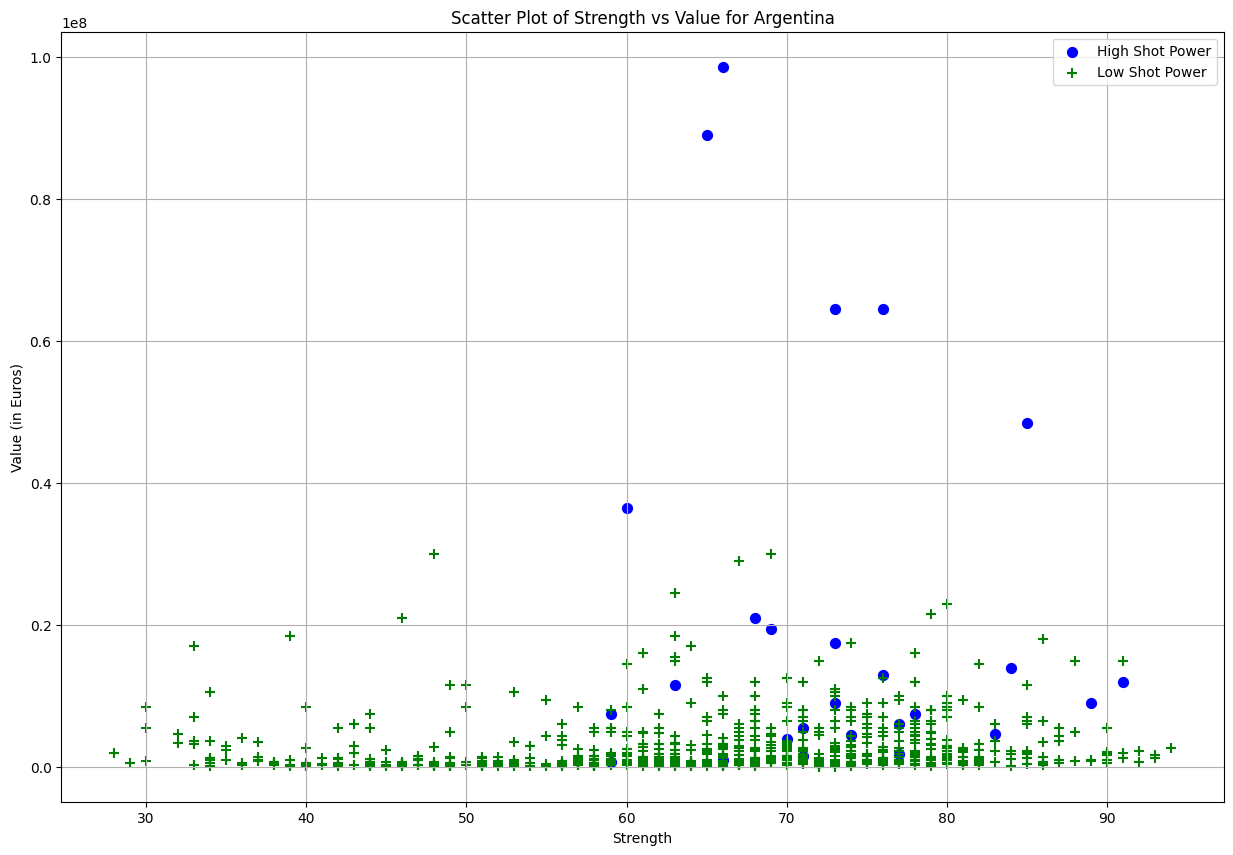

In [34]:
import matplotlib.pyplot as plt

def plot_scatter_chart(df, nationality):
    high_shot_power = df[(df['nationality'] == nationality) & (df['shot_power'] > 80)]
    low_shot_power = df[(df['nationality'] == nationality) & (df['shot_power'] <= 80)]

    plt.figure(figsize=(15, 10))
    plt.scatter(high_shot_power['strength'], high_shot_power['value_euro'], color='blue', label='High Shot Power', s=50)
    plt.scatter(low_shot_power['strength'], low_shot_power['value_euro'], marker='+', color='green', label='Low Shot Power', s=50)
    
    plt.xlabel("Strength")
    plt.ylabel("Value (in Euros)")
    plt.title("Scatter Plot of Strength vs Value for " + nationality)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_scatter_chart(df5, "Argentina")


In [35]:
def remove_shot_power_outliers(df):
    exclude_indices = np.array([])
    for nationality, nationality_df in df.groupby('nationality'):
        shot_power_stats = {}
        for shot_power, shot_power_df in nationality_df.groupby('shot_power'):
            shot_power_stats[shot_power] = {
                'mean': np.mean(shot_power_df['reputation_strength_ratio']),
                'std': np.std(shot_power_df['reputation_strength_ratio']),
                'count': shot_power_df.shape[0]
            }
        for shot_power, shot_power_df in nationality_df.groupby('shot_power'):
            stats = shot_power_stats.get(shot_power - 1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, shot_power_df[shot_power_df['reputation_strength_ratio'] < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

df6 = remove_shot_power_outliers(df5)
df6.shape

(8461, 15)

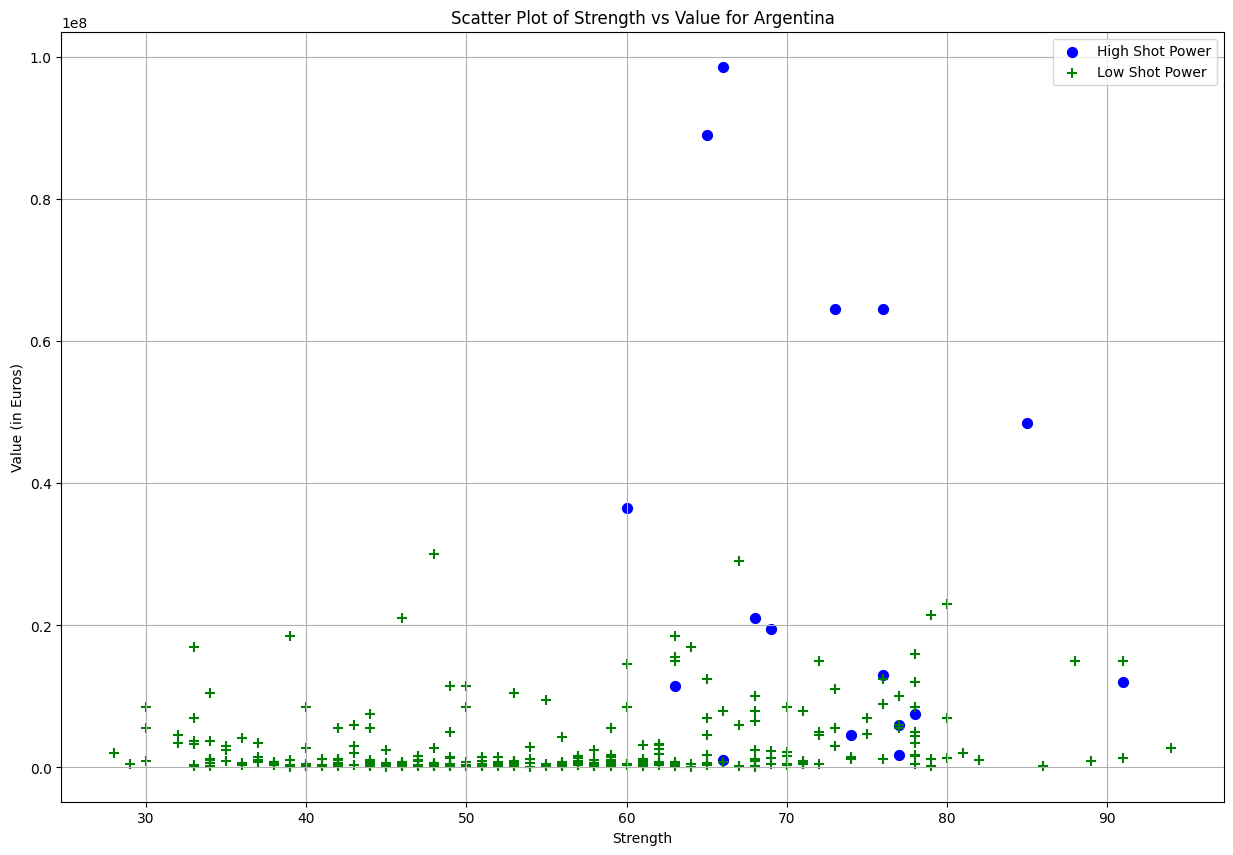

In [36]:
plot_scatter_chart(df6,"Argentina")

Text(0, 0.5, 'count')

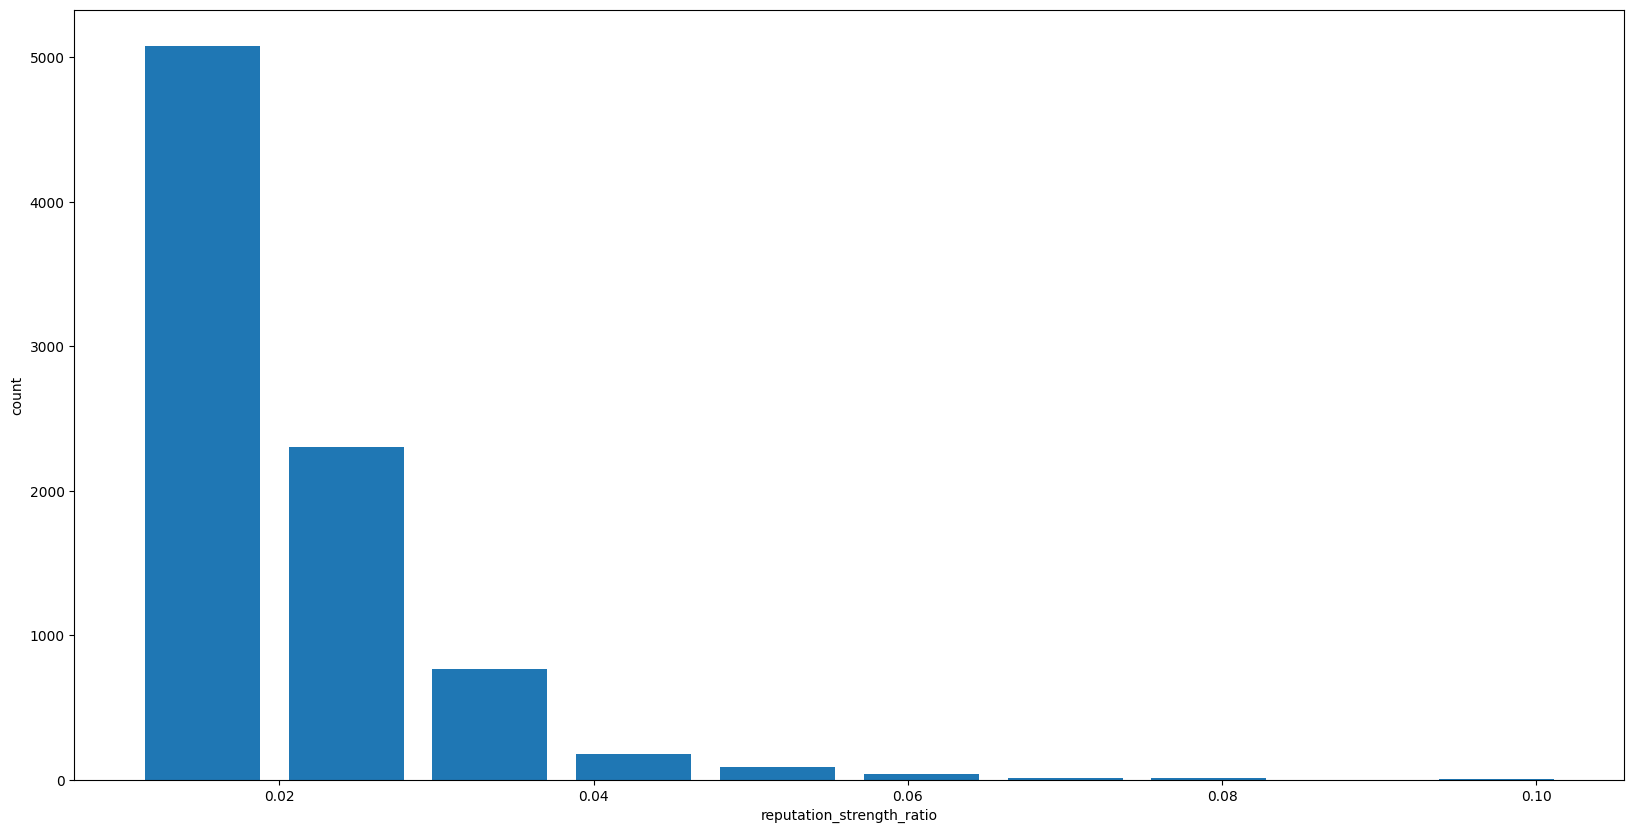

In [37]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
plt.hist(df6.reputation_strength_ratio,rwidth=0.8)
plt.xlabel("reputation_strength_ratio")
plt.ylabel("count")

In [38]:
df7=df6.copy()
df7.strength.unique()

array([66, 58, 87, 44, 94, 92, 71, 73, 78, 77, 70, 62, 65, 85, 76, 79, 42,
       61, 59, 68, 89, 75, 64, 67, 82, 83, 52, 86, 57, 72, 80, 81, 63, 45,
       46, 84, 74, 88, 69, 49, 60, 50, 90, 38, 54, 48, 91, 43, 55, 33, 53,
       37, 35, 34, 93, 47, 36, 41, 39, 51, 32, 56, 30, 40, 28, 31, 27, 29,
       25, 26, 24, 95, 20], dtype=int64)

In [39]:
df7[df7.strength>75]

,name,age,height_cm,weight_kgs,positions,nationality,overall_rating,international_reputation,freekick_accuracy,shot_power,strength,preferred_foot,value_euro,CDM,reputation_strength_ratio
2,P. Pogba,25,190.50,83.9,"CM,CAM",France,88,4,82,90,87,Right,73000000.0,CM,0.045977
4,K. Koulibaly,27,187.96,88.9,CB,Senegal,88,3,28,55,94,Right,60000000.0,CB,0.031915
5,V. van Dijk,27,193.04,92.1,CB,Netherlands,88,3,70,81,92,Right,59500000.0,CB,0.032609
9,E. Cavani,32,185.42,77.1,ST,Uruguay,89,4,76,87,78,Right,60000000.0,ST,0.051282
10,Sergio Busquets,30,187.96,76.2,"CDM,CM",Spain,89,4,68,61,77,Right,51500000.0,CDM,0.051948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17935,R. Lewandowski,30,182.88,79.8,ST,Poland,90,4,86,88,84,Right,77000000.0,ST,0.047619
17937,H. Kane,25,187.96,88.9,ST,England,90,3,68,88,84,Right,96500000.0,ST,0.035714
17938,L. Suárez,32,182.88,86.2,ST,Uruguay,91,5,84,86,83,Right,80000000.0,ST,0.060241
17944,Cristiano Ronaldo,34,187.96,83.0,"ST,LW",Portugal,94,5,76,95,79,Right,77000000.0,ST,0.063291


Text(0, 0.5, 'count')

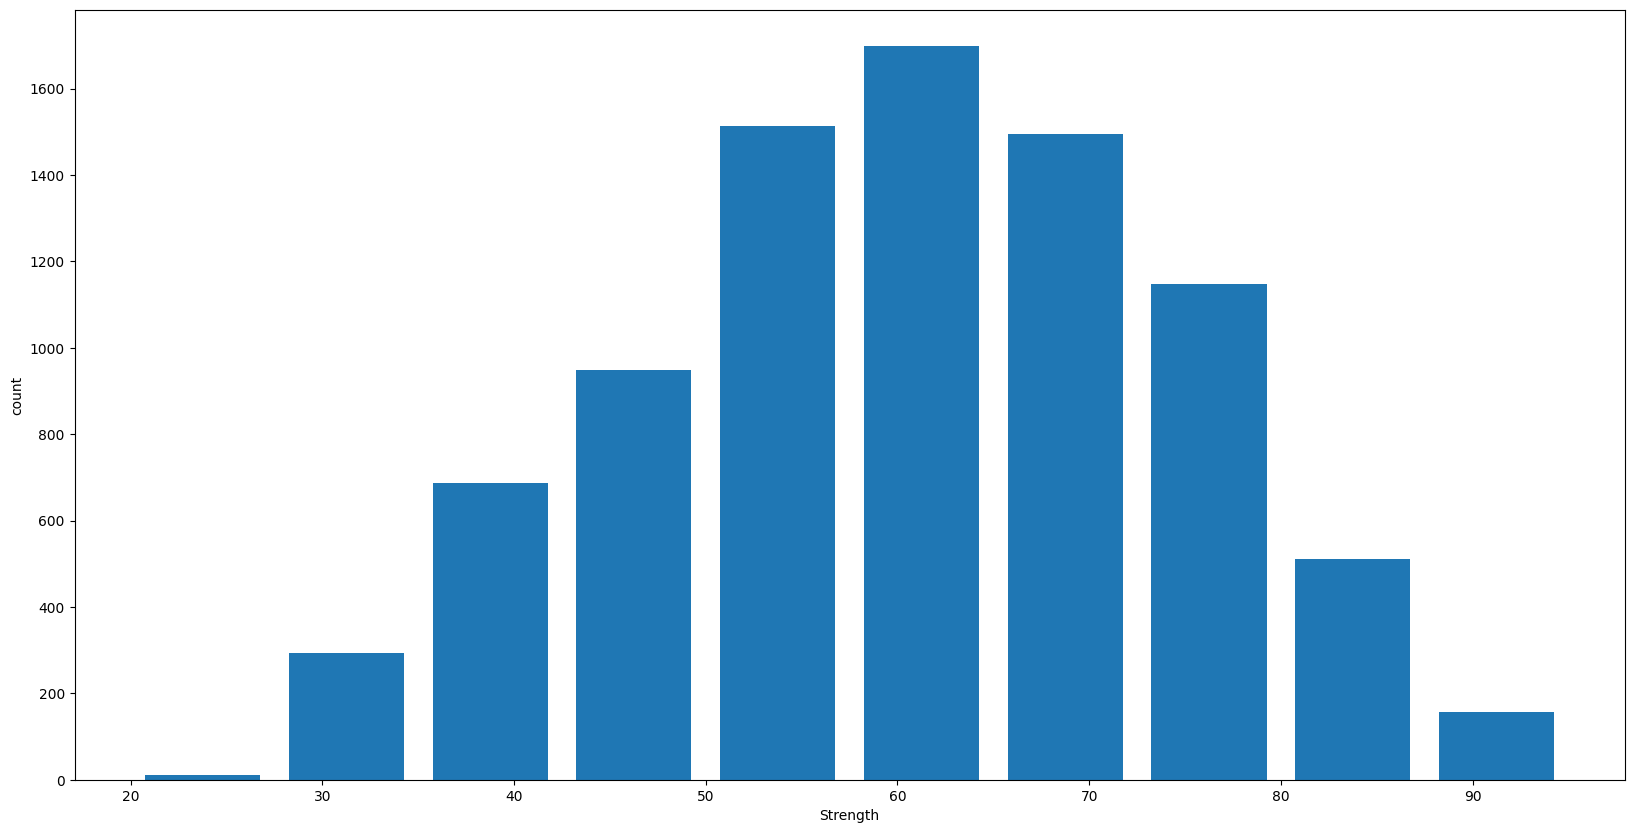

In [40]:
plt.hist(df7.strength,rwidth=0.8)
plt.xlabel("Strength")
plt.ylabel("count")

In [41]:
df8=df7[df7.strength<df7.shot_power+2]
df8.shape

(4564, 15)

In [42]:
df9=df8.drop(['height_cm','reputation_strength_ratio'],axis='columns')
df9.head(3)

,name,age,weight_kgs,positions,nationality,overall_rating,international_reputation,freekick_accuracy,shot_power,strength,preferred_foot,value_euro,CDM
0,L. Messi,31,72.1,"CF,RW,ST",Argentina,94,5,94,85,66,Left,98673094.0,CF
1,C. Eriksen,27,76.2,"CAM,RM,CM",Denmark,88,3,87,84,58,Right,69500000.0,CAM
2,P. Pogba,25,83.9,"CM,CAM",France,88,4,82,90,87,Right,73000000.0,CM


In [43]:
dummies = pd.get_dummies(df9.nationality,dtype=int)
dummies.head()

,Algeria,Argentina,Australia,Austria,Belgium,Bosnia Herzegovina,Brazil,Cameroon,Canada,Chile,...,Spain,Sweden,Switzerland,Turkey,Ukraine,United States,Uruguay,Venezuela,Wales,other
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df10=pd.concat([df9,dummies.drop('other',axis='columns')],axis ='columns')
df10.head()

,name,age,weight_kgs,positions,nationality,overall_rating,international_reputation,freekick_accuracy,shot_power,strength,...,South Africa,Spain,Sweden,Switzerland,Turkey,Ukraine,United States,Uruguay,Venezuela,Wales
0,L. Messi,31,72.1,"CF,RW,ST",Argentina,94,5,94,85,66,...,0,0,0,0,0,0,0,0,0,0
1,C. Eriksen,27,76.2,"CAM,RM,CM",Denmark,88,3,87,84,58,...,0,0,0,0,0,0,0,0,0,0
2,P. Pogba,25,83.9,"CM,CAM",France,88,4,82,90,87,...,0,0,0,0,0,0,0,0,0,0
3,L. Insigne,27,59.0,"LW,ST",Italy,88,3,77,75,44,...,0,0,0,0,0,0,0,0,0,0
6,K. Mbappé,20,73.0,"RW,ST,RM",France,88,3,63,79,71,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df11=df10.drop('nationality',axis='columns')
df11.head(2)

,name,age,weight_kgs,positions,overall_rating,international_reputation,freekick_accuracy,shot_power,strength,preferred_foot,...,South Africa,Spain,Sweden,Switzerland,Turkey,Ukraine,United States,Uruguay,Venezuela,Wales
0,L. Messi,31,72.1,"CF,RW,ST",94,5,94,85,66,Left,...,0,0,0,0,0,0,0,0,0,0
1,C. Eriksen,27,76.2,"CAM,RM,CM",88,3,87,84,58,Right,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df11.shape

(4564, 65)

In [47]:
df11.drop('positions',axis='columns')


,name,age,weight_kgs,overall_rating,international_reputation,freekick_accuracy,shot_power,strength,preferred_foot,value_euro,...,South Africa,Spain,Sweden,Switzerland,Turkey,Ukraine,United States,Uruguay,Venezuela,Wales
0,L. Messi,31,72.1,94,5,94,85,66,Left,98673094.0,...,0,0,0,0,0,0,0,0,0,0
1,C. Eriksen,27,76.2,88,3,87,84,58,Right,69500000.0,...,0,0,0,0,0,0,0,0,0,0
2,P. Pogba,25,83.9,88,4,82,90,87,Right,73000000.0,...,0,0,0,0,0,0,0,0,0,0
3,L. Insigne,27,59.0,88,3,77,75,44,Right,62000000.0,...,0,0,0,0,0,0,0,0,0,0
6,K. Mbappé,20,73.0,88,3,63,79,71,Right,81000000.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17941,K. De Bruyne,27,69.9,91,4,83,91,75,Right,102000000.0,...,0,0,0,0,0,0,0,0,0,0
17943,Neymar Jr,27,68.0,92,5,87,80,49,Right,108000000.0,...,0,0,0,0,0,0,0,0,0,0
17944,Cristiano Ronaldo,34,83.0,94,5,76,95,79,Right,77000000.0,...,0,0,0,0,0,0,0,0,0,0
17948,R. Torres,27,67.1,67,1,68,70,34,Left,900000.0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df11.drop('name',axis='columns')

,age,weight_kgs,positions,overall_rating,international_reputation,freekick_accuracy,shot_power,strength,preferred_foot,value_euro,...,South Africa,Spain,Sweden,Switzerland,Turkey,Ukraine,United States,Uruguay,Venezuela,Wales
0,31,72.1,"CF,RW,ST",94,5,94,85,66,Left,98673094.0,...,0,0,0,0,0,0,0,0,0,0
1,27,76.2,"CAM,RM,CM",88,3,87,84,58,Right,69500000.0,...,0,0,0,0,0,0,0,0,0,0
2,25,83.9,"CM,CAM",88,4,82,90,87,Right,73000000.0,...,0,0,0,0,0,0,0,0,0,0
3,27,59.0,"LW,ST",88,3,77,75,44,Right,62000000.0,...,0,0,0,0,0,0,0,0,0,0
6,20,73.0,"RW,ST,RM",88,3,63,79,71,Right,81000000.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17941,27,69.9,"CAM,CM",91,4,83,91,75,Right,102000000.0,...,0,0,0,0,0,0,0,0,0,0
17943,27,68.0,"LW,CAM",92,5,87,80,49,Right,108000000.0,...,0,0,0,0,0,0,0,0,0,0
17944,34,83.0,"ST,LW",94,5,76,95,79,Right,77000000.0,...,0,0,0,0,0,0,0,0,0,0
17948,27,67.1,CAM,67,1,68,70,34,Left,900000.0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
X=df11.drop('value_euro',axis='columns')
X.head()

,name,age,weight_kgs,positions,overall_rating,international_reputation,freekick_accuracy,shot_power,strength,preferred_foot,...,South Africa,Spain,Sweden,Switzerland,Turkey,Ukraine,United States,Uruguay,Venezuela,Wales
0,L. Messi,31,72.1,"CF,RW,ST",94,5,94,85,66,Left,...,0,0,0,0,0,0,0,0,0,0
1,C. Eriksen,27,76.2,"CAM,RM,CM",88,3,87,84,58,Right,...,0,0,0,0,0,0,0,0,0,0
2,P. Pogba,25,83.9,"CM,CAM",88,4,82,90,87,Right,...,0,0,0,0,0,0,0,0,0,0
3,L. Insigne,27,59.0,"LW,ST",88,3,77,75,44,Right,...,0,0,0,0,0,0,0,0,0,0
6,K. Mbappé,20,73.0,"RW,ST,RM",88,3,63,79,71,Right,...,0,0,0,0,0,0,0,0,0,0


In [50]:
Y= df11.value_euro
Y.head()

0    98673094.0
1    69500000.0
2    73000000.0
3    62000000.0
6    81000000.0
Name: value_euro, dtype: float64

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [52]:
non_numeric_columns = df11.select_dtypes(exclude=['int', 'float']).columns

# Drop non-numeric columns from the DataFrame
df11_numeric = df11.drop(columns=non_numeric_columns)

# Encode categorical columns using one-hot encoding
df11_encoded = pd.get_dummies(df11_numeric)

# Split the dataset into features (X) and target (Y)
X = df11_encoded.drop(columns=['overall_rating'])
Y = df11_encoded['overall_rating']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

# Train the Linear Regression model
lr_clg = LinearRegression()
lr_clg.fit(X_train, Y_train)

# Evaluate the model
score = lr_clg.score(X_test, Y_test)
print("Model Score:", score)

Model Score: 0.7817029072553677


In [53]:
#cross-validation using a ShuffleSplit strategy
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

a=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(LinearRegression(),X,Y,cv=a)

array([0.77806428, 0.78118229, 0.77480788, 0.79269836, 0.7839694 ])

In [79]:
def predict_price(nationality, strength, international_reputation, shot_power, X, reg):
    loc_index = np.where(X.columns == nationality)[0][0]

    x = np.zeros(len(X.columns))
    if loc_index >= 0:
        x[loc_index] = 1
    x[1] = strength
    x[2] = international_reputation
    x[3] = shot_power

    return reg.predict([x])[0]

In [80]:
predict_price('France', 90, 91, 89, X, reg)

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


61.45080183432496

In [81]:
# aiming to find the best model among Linear Regression, Lasso Regression, and Decision Tree Regression using GridSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearch(X, Y):
    # Define the algorithms and their parameter grids
    algorithms = {
        'Linear Regression': {
            'model': LinearRegression(),
            'params': {
                'positive' :[True,False]
            }
        },
        'Lasso': {
            'model': Lasso(),
            'params': {'alpha': [1, 2], 'selection': ['random', 'cyclic']}
        },
        'Decision Tree': {
            'model': DecisionTreeRegressor(),
            'params': {'criterion': ['friedman_mse', 'squared_error', 'absolute_error', 'poisson'], 'splitter': ['best', 'random']}
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algorithms.items():
        grid_search = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        grid_search.fit(X, Y)
        scores.append({
            'model': algo_name,
            'best_score': grid_search.best_score_,
            'best_params': grid_search.best_params_
        })
    scores_df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
    return scores_df
find_best_model_using_gridsearch(X_train, Y_train)


,model,best_score,best_params
0,Linear Regression,0.778243,{'positive': False}
1,Lasso,0.749855,"{'alpha': 1, 'selection': 'cyclic'}"
2,Decision Tree,0.981979,"{'criterion': 'absolute_error', 'splitter': 'b..."


In [76]:
import pickle
with open('fifa_players.pickle','wb') as f:
    pickle.dump(reg,f)

In [59]:
import json
column={
    'data_columns' : [col.lower() for col in X.columns]
}
json_string = json.dumps(column).encode('utf-8')
with open('columns.json',"wb") as f:
    f.write(json_string )

In [60]:
predict_price('Spain', 78, 78, 78, X, reg)

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


60.2397389267247